# Сессия 2. Изучение параметров, влияющих на целевую переменную.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

In [2]:
sop1 = pd.read_csv("sop1.csv", index_col=0)
sop2 = pd.read_csv("sop2.csv", index_col=0)
sop3 = pd.read_csv("sop3.csv", index_col=0)

In [3]:
sop1.head(1)

,echo1,echo2,echo3,echo4,shadow5,shadow6,echo7,echo8,echo-contact9,echo-contact10,echo-contact11,echo-contact12,shadow13,shadow14,echo-contact15,echo-contact16
0,,,,,,,,,,,,,,,,
1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39


Построем корреляционные карты

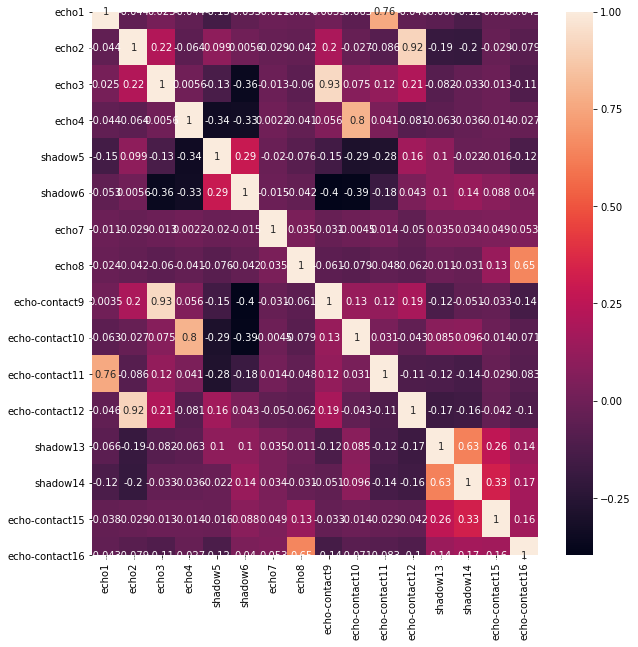

In [4]:
corr = sop1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

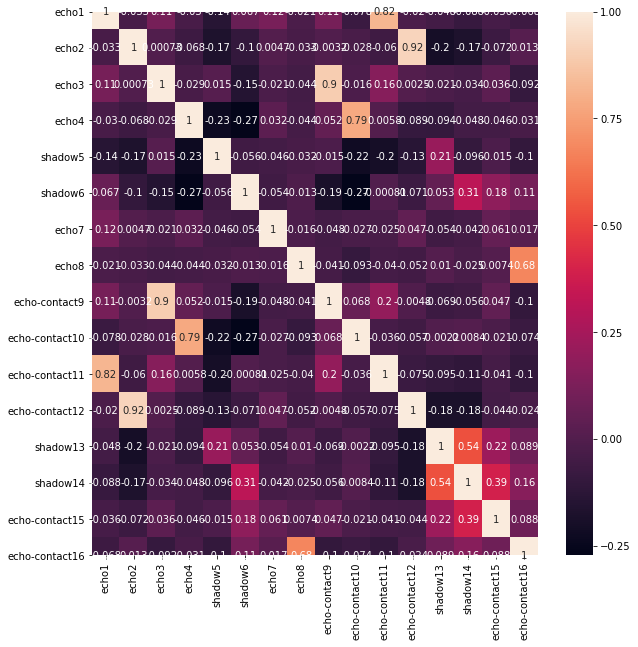

In [5]:
corr = sop2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

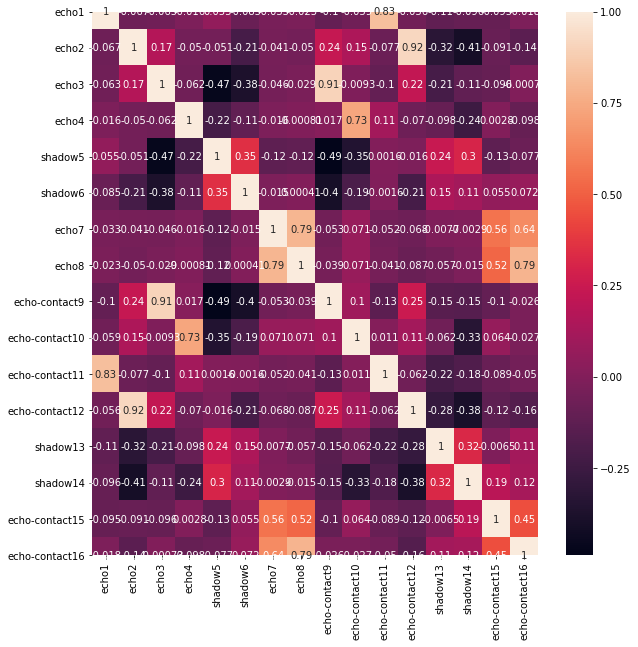

In [6]:
corr = sop3.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Во всех трех картах между собой коррелируют эти столбцы `1~11, 2~12, 3~9, 4~10, 8~16`, потому что это пара столбцов эхо и эхо-контактных методов, которы дублируют друг друга, тем самым при изменении одного наблюдается изменение другого 

#### Определение расстояния между схемами прозвучивания
Рассмотрим расстояние в виде разницы коррелирующего эхо-контактного метода с эхо методом.<br><br> Получим для sop1:

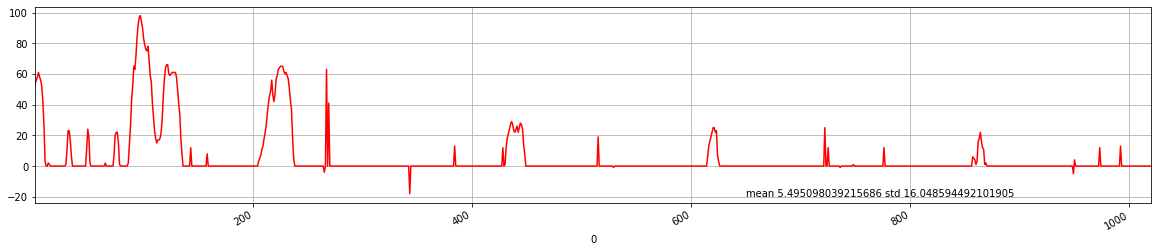

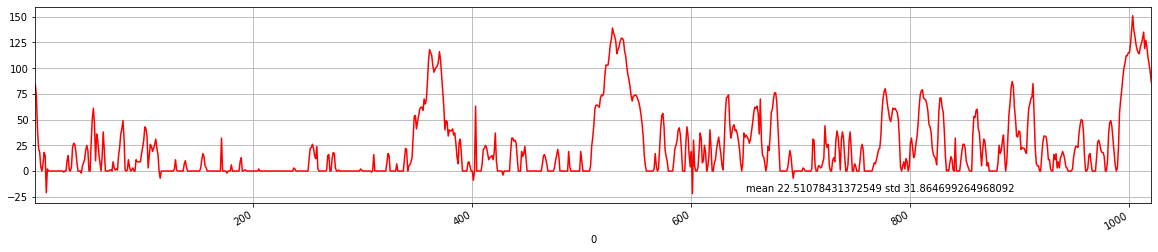

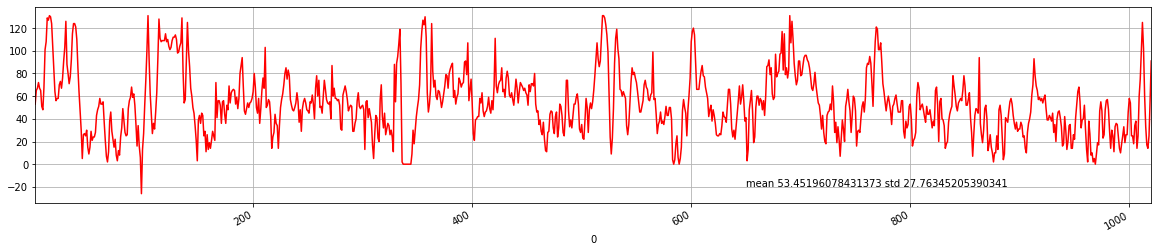

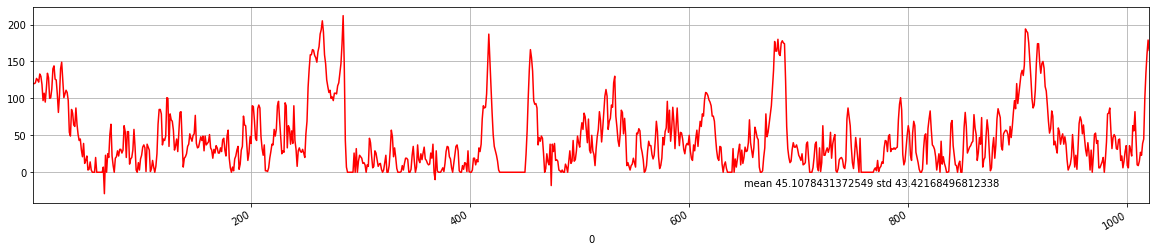

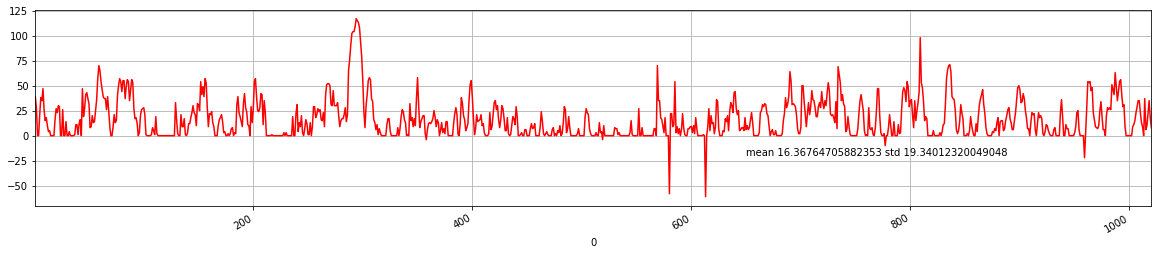

In [7]:
f=['echo'+ str(i) for i in [1,2,3,4,8]]
s=['echo-contact' + str(i) for i in [11,12,9,10,16]]
for i,j in zip(f,s):
    (sop1[j]-sop1[i]).plot(subplots=True,figsize=(20,4),grid="on", color="r")
    plt.text(650,-20,"mean "+str((sop1[j]-sop1[i]).describe()['mean']) + " std " + str((sop1[j]-sop1[i]).describe()['std']))
    plt.show()

Для sop2:

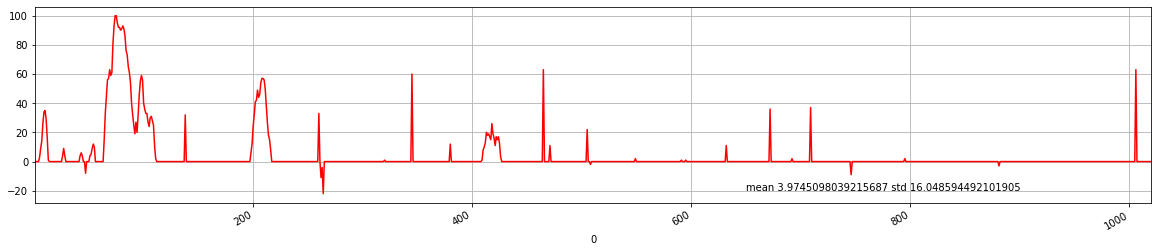

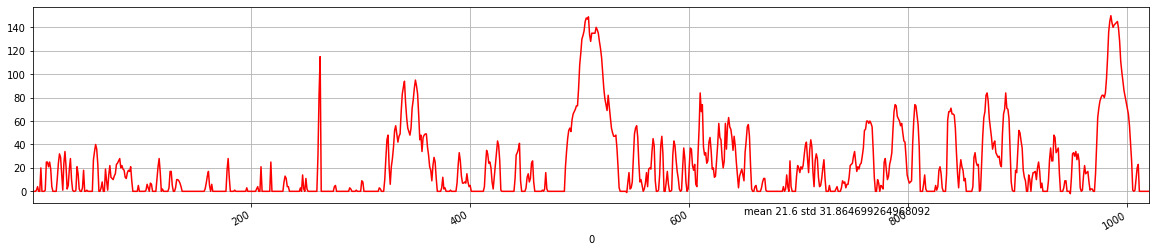

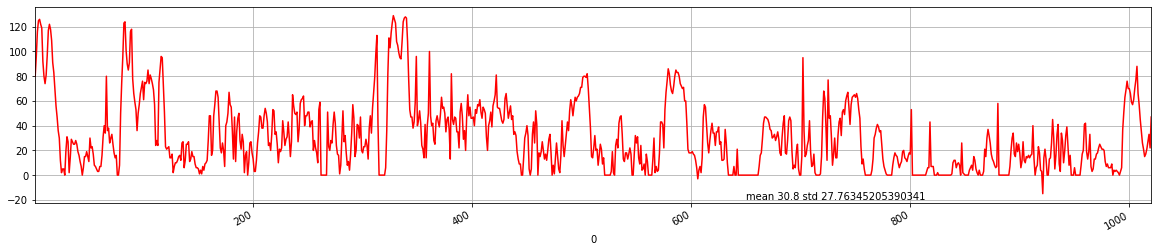

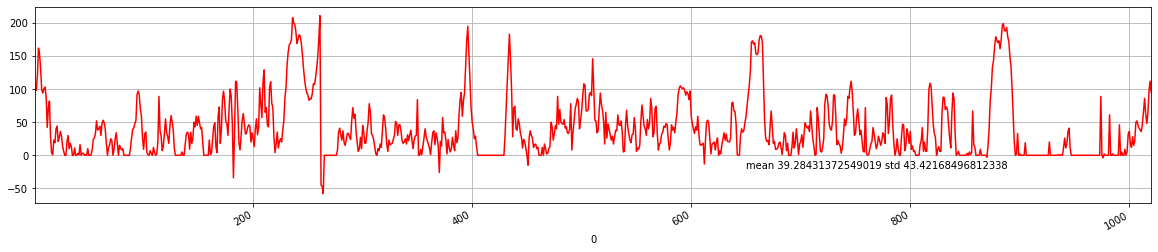

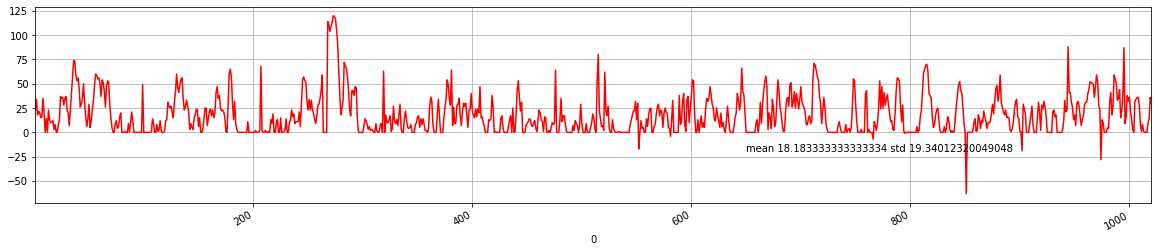

In [8]:
for i,j in zip(f,s):
    (sop2[j]-sop2[i]).plot(subplots=True,figsize=(20,4),grid="on", color="r")
    plt.text(650,-20,"mean " + str((sop2[j]-sop2[i]).describe()['mean']) + " std "+str((sop1[j]-sop1[i]).describe()['std']))
    plt.show()

Для sop3:

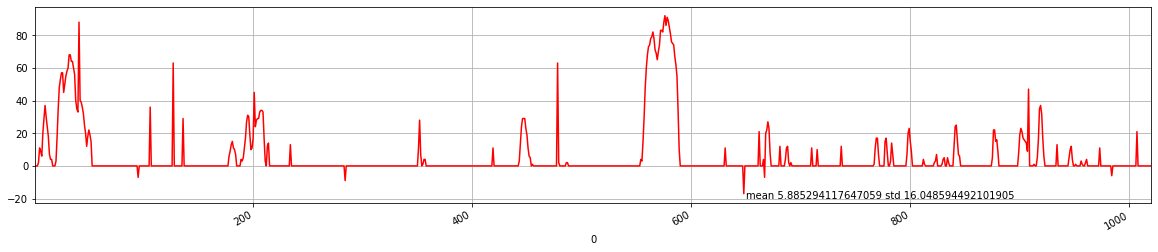

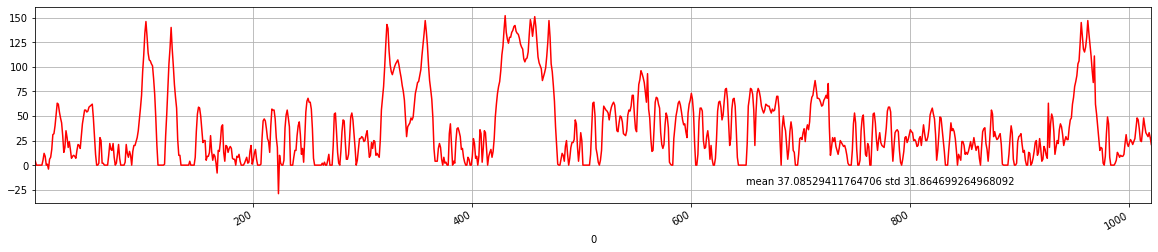

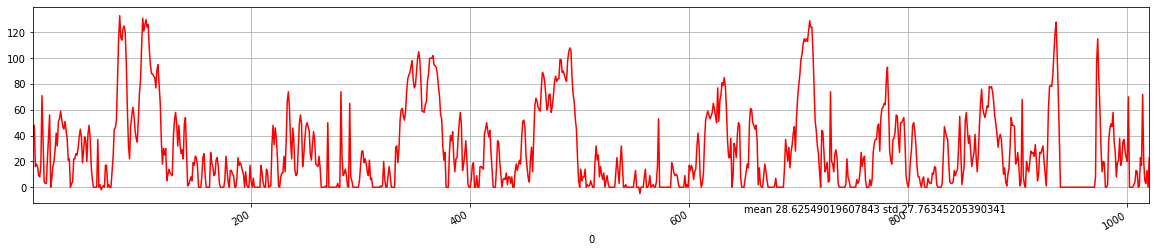

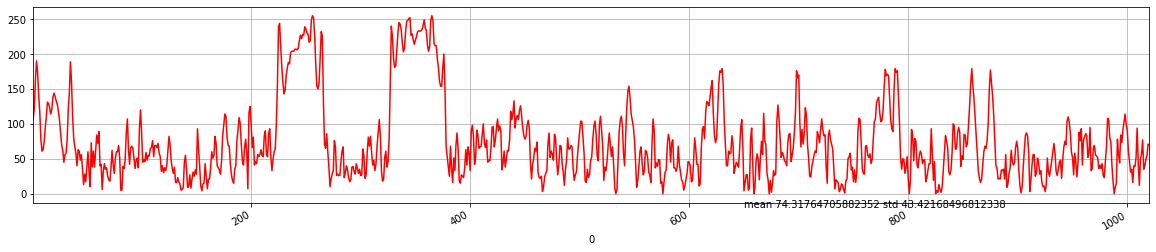

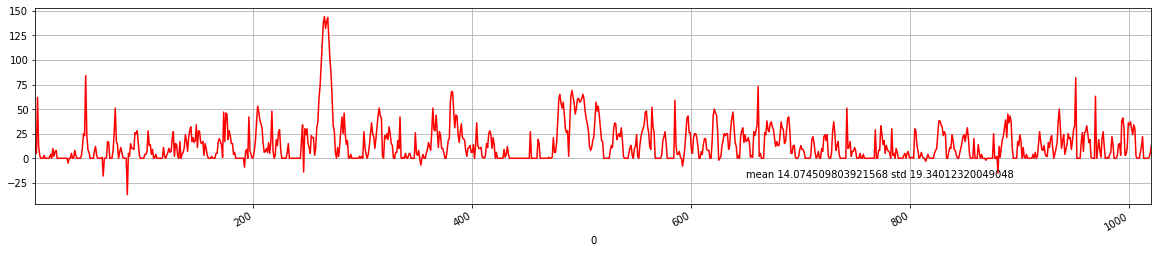

In [9]:
for i,j in zip(f,s):
    (sop3[j]-sop3[i]).plot(subplots=True,figsize=(20,4),grid="on", color="r")
    plt.text(650,-20,"mean " + str((sop3[j]-sop3[i]).describe()['mean']) + " std "+str((sop1[j]-sop1[i]).describe()['std']))
    plt.show()

Расстояние между схемами прозвучивания равно примерно 95, как видно из графиков ниже. При смещении 12 графика влево он очень хорошо совмещается с 10

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8ECA5BAC8>],
      dtype=object)

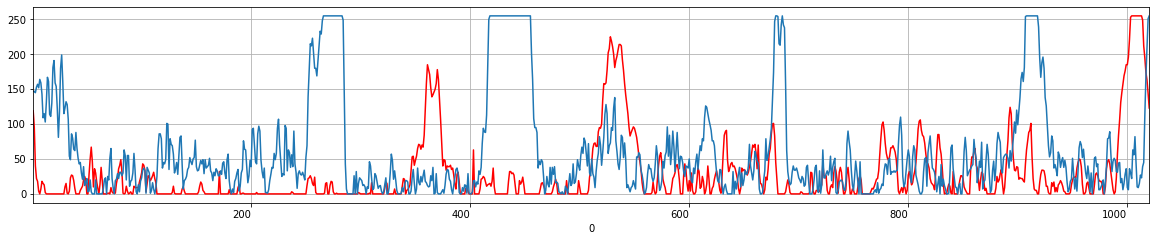

In [10]:
sop1['echo-contact12'].plot(subplots=True,figsize=(20,4),grid="on", color="r")
sop1["echo-contact10"].plot(subplots=True,figsize=(20,4),grid="on")

In [11]:
a = pd.concat([sop1["echo-contact12"][95:],sop1["echo-contact12"][:95]],ignore_index=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8ECAC50C8>],
      dtype=object)

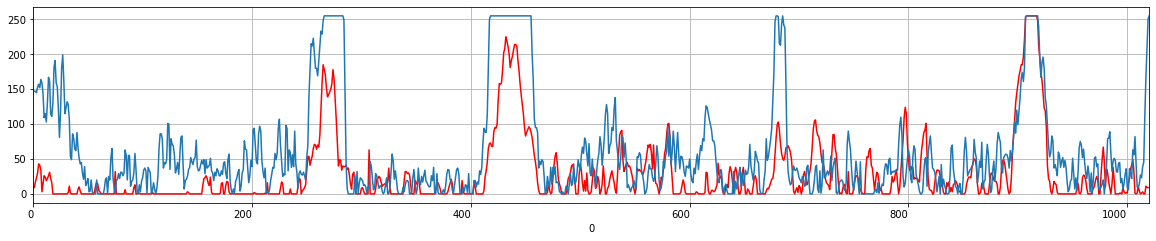

In [12]:
a.plot(subplots=True,figsize=(20,4),grid="on", color="r")
sop1["echo-contact10"].plot(subplots=True,figsize=(20,4),grid="on")

Из задания известно что мы имеем 10 хордовых схем и 6 раздельно-совмещенных. Исходя из коррялиационных карт можно что вывод, что столбцы которые сильно коррелируют: 1,2,7,8,11,12,13,14,15,16 относятся к хордовым методам. <br> Остальные столбцы отнесем к РС методу

In [13]:
d={"Number_of_method": np.arange(1,17), "methods": ["Эхо-метод", "Эхо-метод", "Эхо-метод", "Эхо-метод", "Теневой метод", "Теневой метод","Эхо-метод", "Эхо-метод", 
  "Эхо-контактный", "Эхо-контактный", "Эхо-контактный", "Эхо-контактный", "Теневой метод", "Теневой метод", "Эхо-контактный", "Эхо-контактный"]}

In [14]:
methods=pd.DataFrame(data=d)
methods=methods.set_index("Number_of_method")


In [15]:
methods["Схема"]=["Хордовая", "Хордовая", "Раздельно-совмещенная", "Раздельно-совмещенная", "Раздельно-совмещенная",
                      "Раздельно-совмещенная", "Хордовая", "Хордовая", "Раздельно-совмещенная", "Раздельно-совмещенная",
                      "Хордовая", "Хордовая", "Хордовая", "Хордовая", "Хордовая", "Хордовая"]

In [16]:
methods

,methods,Схема
Number_of_method,,
1,Эхо-метод,Хордовая
2,Эхо-метод,Хордовая
3,Эхо-метод,Раздельно-совмещенная
4,Эхо-метод,Раздельно-совмещенная
5,Теневой метод,Раздельно-совмещенная
6,Теневой метод,Раздельно-совмещенная
7,Эхо-метод,Хордовая
8,Эхо-метод,Хордовая
9,Эхо-контактный,Раздельно-совмещенная


Давайте разобьем все наши методы на две стороны в которых они распологаются. 12 и 10 методы распологаются на разных сторонах(см выше). следовательно и их эхо методы(2,4 соответственно) также распологаются на разных сторонах 

In [17]:
sideA=['echo2','echo-contact12']
sideB=["echo4", 'echo-contact10']

In [18]:
E = ['echo1', 'echo3','echo7', 'echo8',]
EC = ['echo-contact9', 'echo-contact11',  'echo-contact15', 'echo-contact16']
SH = ['shadow5', 'shadow6', 'shadow13', 'shadow14']

Рассмотрим сначала теневые методы.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8EC6E0588>,
      dtype=object)

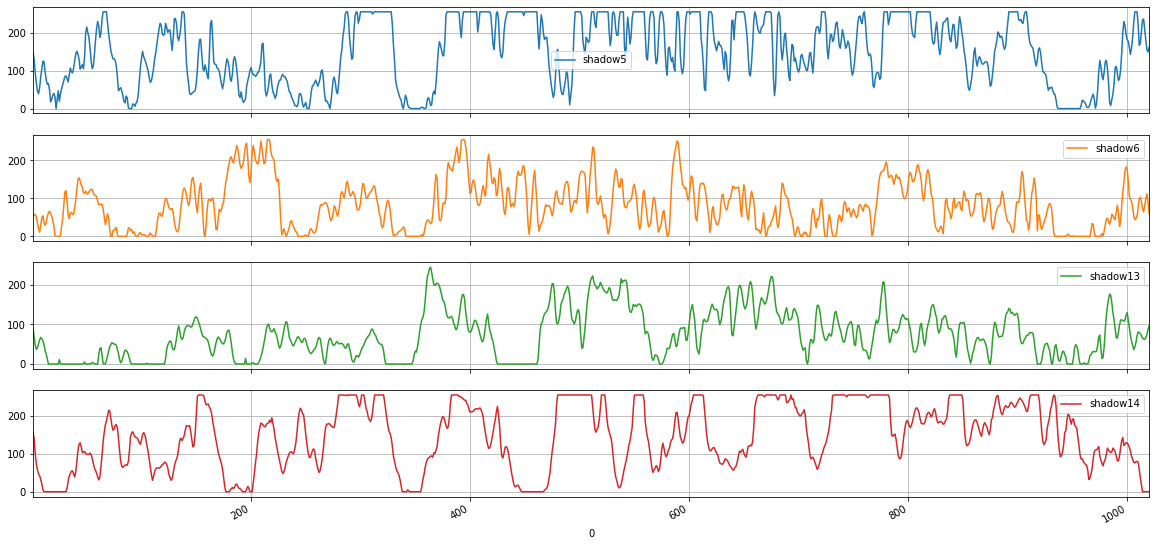

In [19]:
sop3[SH].plot(subplots=True,figsize=(20,10),grid="on")

Видно что 5 и 6 методы похожи и 13,14 похожи. 

In [20]:
a = pd.concat([sop3["shadow14"][95:],sop3["shadow14"][:95]],ignore_index=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8EBB32D48>],
      dtype=object)

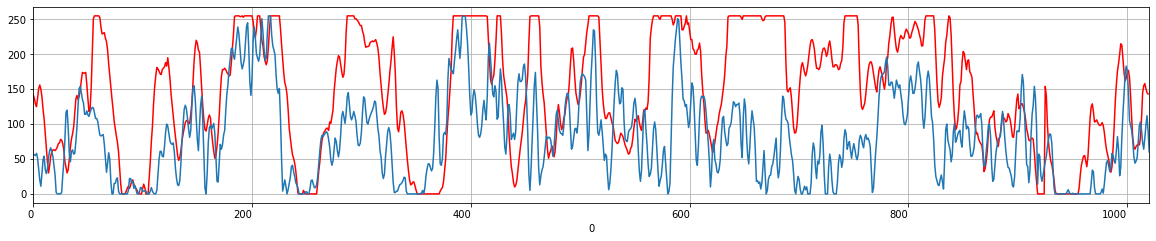

In [21]:
a.plot(subplots=True,figsize=(20,4),grid="on", color="r")
sop3["shadow6"].plot(subplots=True,figsize=(20,4),grid="on")

Сдвинув вторые получаем что 13, 14 на первой стороне тк они были раньше по времени и мы их смещали, а 5,6 на второй.

In [22]:
sideA=['echo2','echo-contact12','shadow13', 'shadow14']
sideB=["echo4", 'echo-contact10','shadow5', 'shadow6']

Рассмотрим эхо-контактные методы 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8EB4F1AC8>,
      dtype=object)

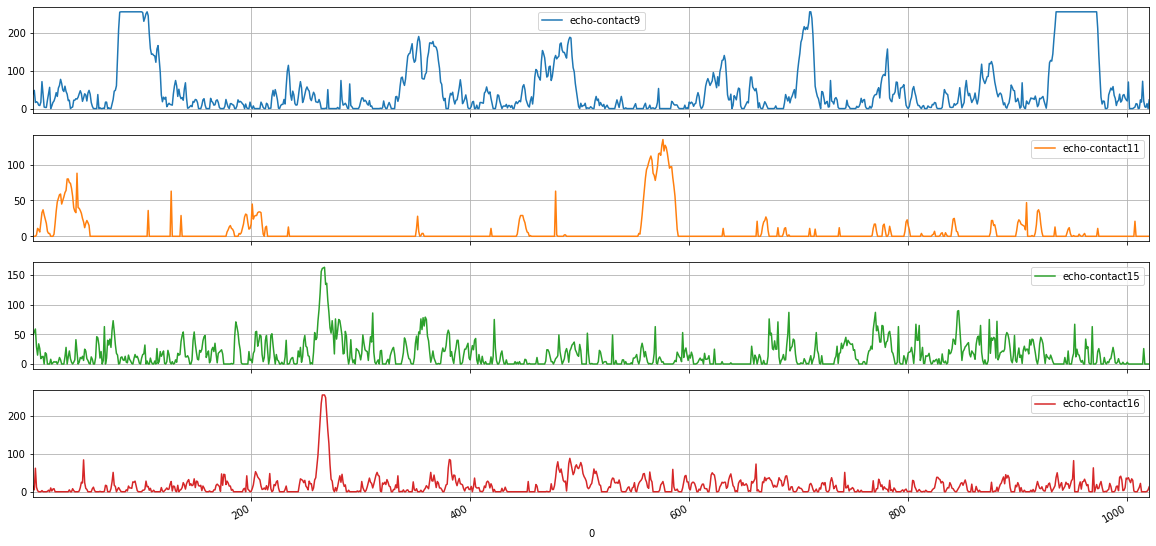

In [23]:
sop3[EC].plot(subplots=True,figsize=(20,10),grid="on")

In [24]:
a = pd.concat([sop3["echo-contact15"][95:], sop3["echo-contact15"][:95]], ignore_index=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8EBB40CC8>],
      dtype=object)

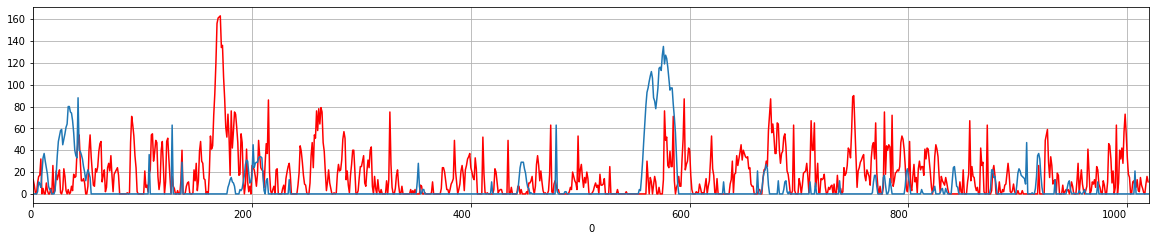

In [25]:
a.plot(subplots=True,figsize=(20,4),grid="on", color="r")
sop3["echo-contact11"].plot(subplots=True,figsize=(20,4),grid="on")

Сдвинув 15 к 11 видим совмещение и можем предположить что 15 находится на первой тороне а 11 на второй. С ними соответственно идут похожие эхо-контактные методы(16,9 соответственно). Также соответствующие эхо методы находятся на той же стороне что и их парные эхо-контактные методы<br><br>
получаем:

In [26]:
sideA=['echo2','echo-contact12','shadow13', 'shadow14', 'echo-contact15', 'echo-contact16', 'echo7', 'echo8']
sideB=["echo4", 'echo-contact10','shadow5', 'shadow6','echo-contact9', 'echo-contact11','echo1', 'echo3']

methods["Сторона"]=["B", "A", "B", "B", "B", "B", "A", "A", "B", "B", "B", "A", "A", "A", "A", "A" ]

Чтобы определить продольный или поперечный эхо нам нужно посмотреть на толщину подъема на графиках данных.<br><br> Короткую длинну можно увидеть на  1, 7, 8, 15, 16. Длинные на 2, 3, 4, 10, 11, 12, 14

In [27]:
methods["Дефект"]=["Поперечный", "Продольный", "Продольный",
                   "Продольный","-","-",
                   "Поперечный","Поперечный", "-", 
                   "Продольный", "Продольный","Продольный",
                   "-", "Продольный", "Поперечный", "Поперечный"]

In [28]:
methods

,methods,Схема,Сторона,Дефект
Number_of_method,,,,
1,Эхо-метод,Хордовая,B,Поперечный
2,Эхо-метод,Хордовая,A,Продольный
3,Эхо-метод,Раздельно-совмещенная,B,Продольный
4,Эхо-метод,Раздельно-совмещенная,B,Продольный
5,Теневой метод,Раздельно-совмещенная,B,-
6,Теневой метод,Раздельно-совмещенная,B,-
7,Эхо-метод,Хордовая,A,Поперечный
8,Эхо-метод,Хордовая,A,Поперечный
9,Эхо-контактный,Раздельно-совмещенная,B,-


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8EBD07D08>,
      dtype=object)

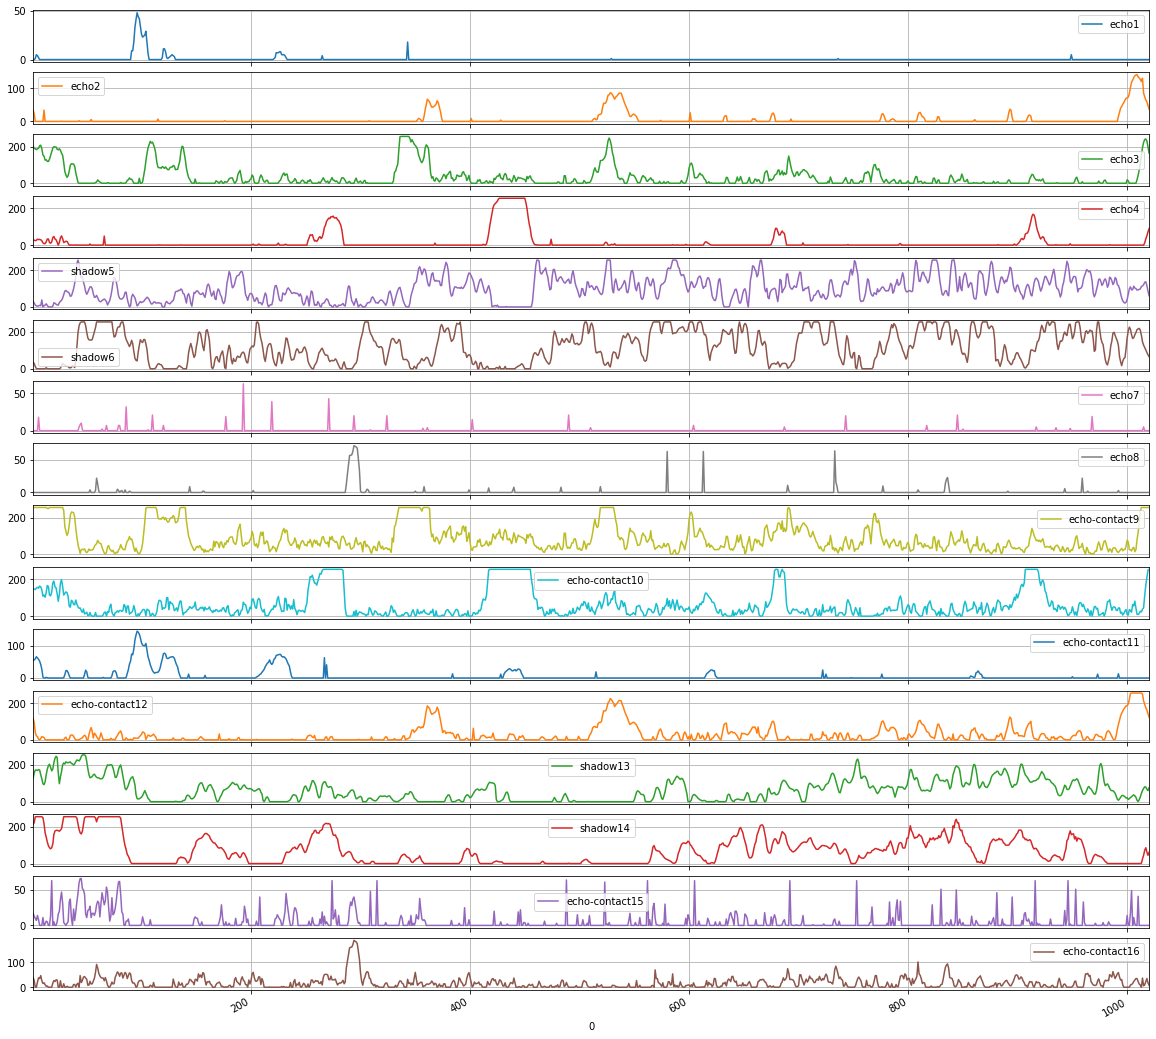

In [29]:
sop1.plot(subplots=True,figsize=(20,20),grid="on")

### Приведение к общей координате.
<br>
никакие данные мы не убираем тк в данных датасетах нет незначащих данных, также данные нужно обрезать тк длина окружности равна 1020

In [ ]:
sop1 = sop1[:1020]
sop2 = sop2[:1020]
sop3 = sop3[:1020]